## Machine Learning and Sentiment Analysis


In [246]:
#pip install praw 

In [247]:
# Immporting necessary libraries for Reddit API
import praw 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore') # We can suppress the warnings

# Importing machine algorithms 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer,  CountVectorizer
from sklearn.ensemble import  RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, cohen_kappa_score, classification_report, roc_curve, auc, confusion_matrix
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier


In [248]:
try:
    # Specify data types and read only necessary columns
    df_reddit = pd.read_csv('df_reddit.csv')
    # Display the first few rows
    print(df_reddit.head())
except FileNotFoundError:
    print("The file 'df_reddit.csv' was not found.")
except pd.errors.EmptyDataError:
    print("The file 'df_reddit.csv' is empty.")
except pd.errors.ParserError:
    print("There was an error parsing the file 'df_reddit.csv'.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")


   Unnamed: 0  score                                               body  \
0           0    559  ireland always done food well excellent qualit...   
1           1    217  food genuinely super cheap ireland relative wa...   
2           2     57  polish person confirm visited poland summer pr...   
3           3     42        poor poor turkey damn swiss something right   
4           4    105  quality price fruit veg staple aldi lidl tesco...   

     neg    neu    pos  compound sentiment_label  \
0  0.000  0.580  0.420    0.7003        Positive   
1  0.035  0.836  0.128    0.8259        Positive   
2  0.000  1.000  0.000    0.0000         Neutral   
3  0.535  0.465  0.000   -0.8478        Negative   
4  0.000  0.756  0.244    0.7960        Positive   

                                              tokens  
0  ['ireland', 'always', 'done', 'food', 'well', ...  
1  ['food', 'genuinely', 'super', 'cheap', 'irela...  
2  ['polish', 'person', 'confirm', 'visited', 'po...  
3  ['poor', 'poo

In [249]:
df_reddit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401 entries, 0 to 400
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       401 non-null    int64  
 1   score            401 non-null    int64  
 2   body             397 non-null    object 
 3   neg              401 non-null    float64
 4   neu              401 non-null    float64
 5   pos              401 non-null    float64
 6   compound         401 non-null    float64
 7   sentiment_label  401 non-null    object 
 8   tokens           401 non-null    object 
dtypes: float64(4), int64(2), object(3)
memory usage: 28.3+ KB


In [250]:
df_reddit.head()

,Unnamed: 0,score,body,neg,neu,pos,compound,sentiment_label,tokens
0,0,559,ireland always done food well excellent qualit...,0.000,0.580,0.420,0.7003,Positive,"['ireland', 'always', 'done', 'food', 'well', ..."
1,1,217,food genuinely super cheap ireland relative wa...,0.035,0.836,0.128,0.8259,Positive,"['food', 'genuinely', 'super', 'cheap', 'irela..."
2,2,57,polish person confirm visited poland summer pr...,0.000,1.000,0.000,0.0000,Neutral,"['polish', 'person', 'confirm', 'visited', 'po..."
3,3,42,poor poor turkey damn swiss something right,0.535,0.465,0.000,-0.8478,Negative,"['poor', 'poor', 'turkey', 'damn', 'swiss', 's..."
4,4,105,quality price fruit veg staple aldi lidl tesco...,0.000,0.756,0.244,0.7960,Positive,"['quality', 'price', 'fruit', 'veg', 'staple',..."


In [251]:
print(df_reddit.shape)
df_reddit.describe()

(401, 9)


,Unnamed: 0,score,neg,neu,pos,compound
count,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000
mean,200.000000,9.431421,0.062122,0.833005,0.104880,0.150229
std,115.902977,37.733618,0.116955,0.162205,0.132253,0.438242
min,0.000000,-38.000000,0.000000,0.000000,0.000000,-0.951200
25%,100.000000,1.000000,0.000000,0.752000,0.000000,0.000000
50%,200.000000,2.000000,0.000000,0.849000,0.074000,0.000000
75%,300.000000,6.000000,0.082000,1.000000,0.168000,0.489800
max,400.000000,559.000000,1.000000,1.000000,1.000000,0.984600


In [252]:
df_reddit.head()
df_reddit.isna().sum()
df_reddit = df_reddit.dropna()

## Sentiment Analysis and Machine Learning 

In [253]:
# initialising X and y 
X = df_reddit['body']
y = df_reddit['sentiment_label']
X.shape, y.shape

((397,), (397,))

In [254]:
# Vectorizing the text data
tfidf_vectorizer = TfidfVectorizer()
count_vectorizer = CountVectorizer()

X_tfidf = tfidf_vectorizer.fit_transform(X)
Count_vect = count_vectorizer.fit_transform(X)


# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

In [255]:
# Define classification models
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "k-Nearest Neighbour": KNeighborsClassifier(n_neighbors=7),
    "Support Vector Machine": SVC(probability=True, random_state=42),
    "MultinomialNB" : MultinomialNB()
}


In [256]:
# Store results
results = []

# Train and evaluate models
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    kappa = cohen_kappa_score(y_test, y_pred)  # Cohen's Kappa

    # Append results to the list
    results.append([name, accuracy, precision, recall, f1,kappa])

# Create a DataFrame to display the results
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score","Cohen's Kappa"])
results_df


,Model,Accuracy,Precision,Recall,F1 Score,Cohen's Kappa
0,Logistic Regression,0.5000,0.781690,0.5000,0.420881,0.182004
1,Decision Tree,0.5625,0.559832,0.5625,0.553969,0.288979
2,Random Forest,0.6125,0.569003,0.6125,0.570128,0.355509
3,k-Nearest Neighbour,0.4875,0.543750,0.4875,0.443507,0.195289
4,Support Vector Machine,0.4875,0.779340,0.4875,0.401812,0.162197
5,MultinomialNB,0.5125,0.784107,0.5125,0.443894,0.205703


In [257]:
from sklearn.metrics import roc_auc_score

# Dictionary to store ROC AUC scores
roc_auc_scores = {}

# Iterate through models and calculate ROC AUC
for name, model in models.items():
    if hasattr(model, "predict_proba"):
        # Use predict_proba for ROC AUC
        y_pred_proba = model.predict_proba(X_test)
        auc_score = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
        roc_auc_scores[name] = auc_score
    elif hasattr(model, "decision_function"):
        # Use decision_function for ROC AUC
        y_decision = model.decision_function(X_test)
        auc_score = roc_auc_score(y_test, y_decision, multi_class='ovr')
        roc_auc_scores[name] = auc_score
    else:
        print(f"{name} does not support probability estimates or decision function for ROC AUC.")

# Display ROC AUC scores
roc_auc_df = pd.DataFrame(list(roc_auc_scores.items()), columns=["Model", "ROC AUC Score"])
roc_auc_df.sort_values(by="ROC AUC Score", ascending=False, inplace=True)
print("\nROC AUC Scores for Models:")
print(roc_auc_df)


ROC AUC Scores for Models:
                    Model  ROC AUC Score
0     Logistic Regression       0.766021
4  Support Vector Machine       0.764384
5           MultinomialNB       0.748816
2           Random Forest       0.726453
3     k-Nearest Neighbour       0.676673
1           Decision Tree       0.635140


In [258]:
# Cross-validation
cv_results = []
for name, model in models.items():
    # Perform cross-validation
    cv_scores = cross_val_score(model, X_tfidf, y, cv=5, scoring='accuracy')  # Using accuracy for scoring
    mean_cv_score = cv_scores.mean()
    
    # Store results
    cv_results.append([name, mean_cv_score])

# Create a DataFrame to display cross-validation results
cv_results_df = pd.DataFrame(cv_results, columns=["Model", "Mean CV Accuracy"])
print("\nModel Performance Metrics using Cross-Validation:")
print(cv_results_df)

# Hyperparameter tuning
param_grid = {
    'Logistic Regression': {'C': [0.01, 0.1, 1, 10]},
    'Decision Tree': {'max_depth': [5, 10, 15, 20, 50]},
    'Random Forest': {'n_estimators': [50, 100, 200]},
    'k-Nearest Neighbour': {'n_neighbors': [3, 5, 7, 9], 'p': [1, 2], 'metric': ['minkowski', 'euclidean', 'manhattan']},
    'Support Vector Machine': {'C': [0.1, 1, 10], 'gamma': [0.1, 0.01, 0.001], 'kernel': ['linear', 'rbf']},
    'MultinomialNB': {'alpha': [0.1, 0.5, 1, 2, 5]}
}


Model Performance Metrics using Cross-Validation:
                    Model  Mean CV Accuracy
0     Logistic Regression          0.569335
1           Decision Tree          0.521519
2           Random Forest          0.556772
3     k-Nearest Neighbour          0.513892
4  Support Vector Machine          0.536519
5           MultinomialNB          0.556677


In [259]:
# Store hyperparameter tuning results
tuned_results = []
predictions = {}

# Perform GridSearchCV for each model
for name, model in models.items():
    grid_search = GridSearchCV(model, param_grid[name], cv=5, scoring='accuracy')
    
    # Fit the grid search
    grid_search.fit(X_train, y_train)
    
    # Best parameters and best score
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    
    # Store results
    tuned_results.append([name, best_params, best_score])
    
    # Fit the best model on the training data
    best_model = grid_search.best_estimator_
    best_model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = best_model.predict(X_test)
    
    # Store predictions for plotting
    predictions[name] = y_pred

# Create a DataFrame to display the hyperparameter tuning results
tuned_results_df = pd.DataFrame(tuned_results, columns=["Model", "Best Parameters", "Best CV Accuracy"])
print("\nBest Hyperparameters and Scores from Grid Search:")
tuned_results_df




Best Hyperparameters and Scores from Grid Search:


,Model,Best Parameters,Best CV Accuracy
0,Logistic Regression,{'C': 10},0.590327
1,Decision Tree,{'max_depth': 15},0.520685
2,Random Forest,{'n_estimators': 200},0.549058
3,k-Nearest Neighbour,"{'metric': 'minkowski', 'n_neighbors': 9, 'p': 2}",0.536657
4,Support Vector Machine,"{'C': 1, 'gamma': 0.1, 'kernel': 'linear'}",0.587054
5,MultinomialNB,{'alpha': 0.5},0.583929


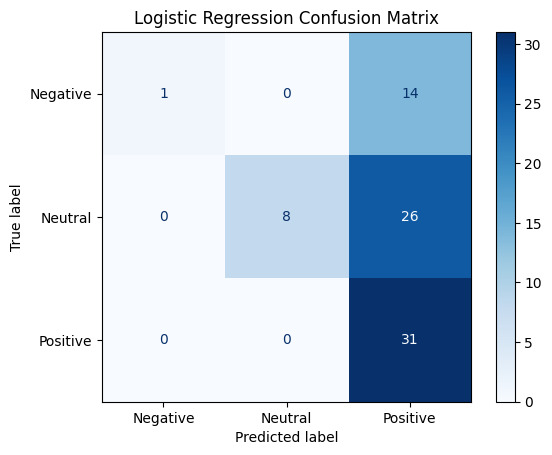

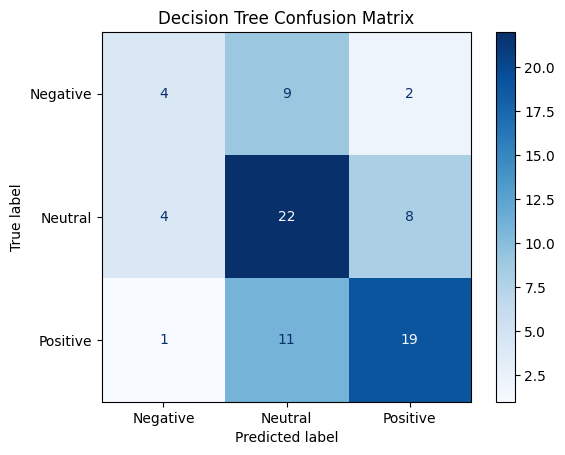

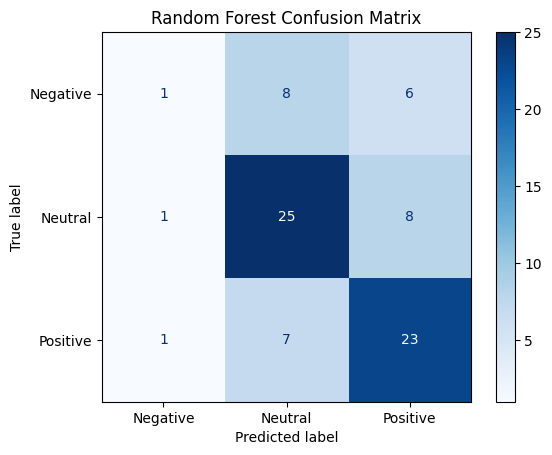

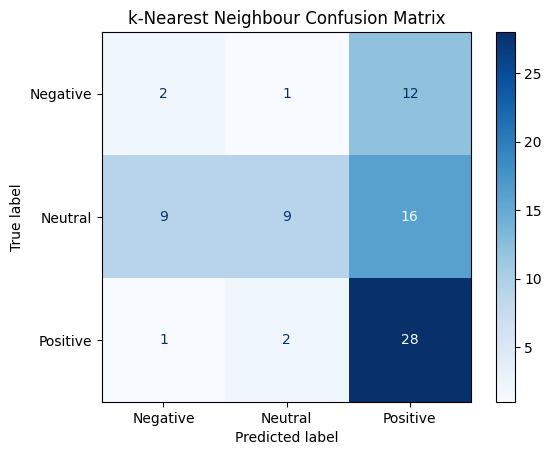

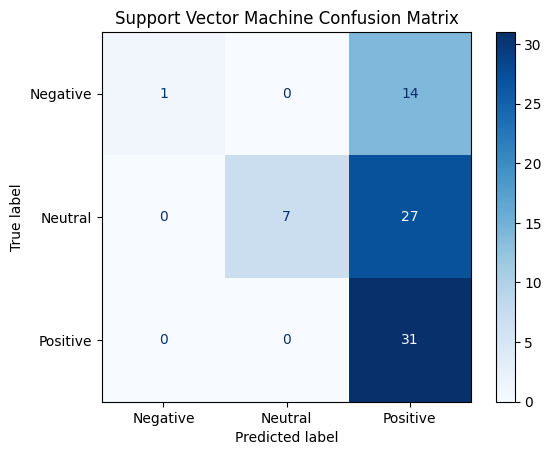

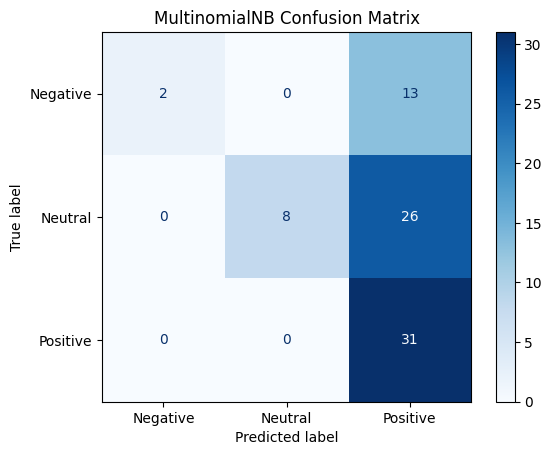

In [260]:
from sklearn.metrics import ConfusionMatrixDisplay

for name, model in models.items():
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='Blues')
    plt.title(f'{name} Confusion Matrix')
    plt.show()


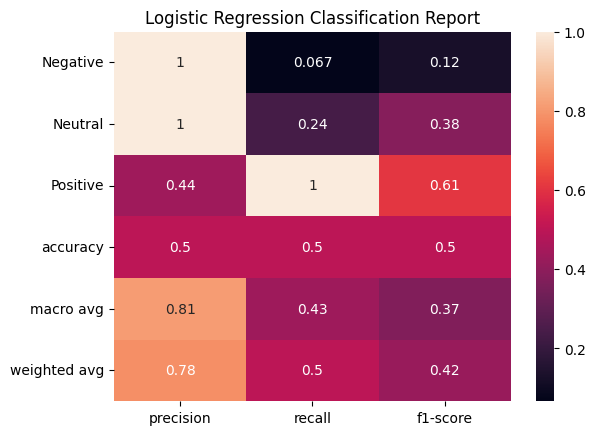

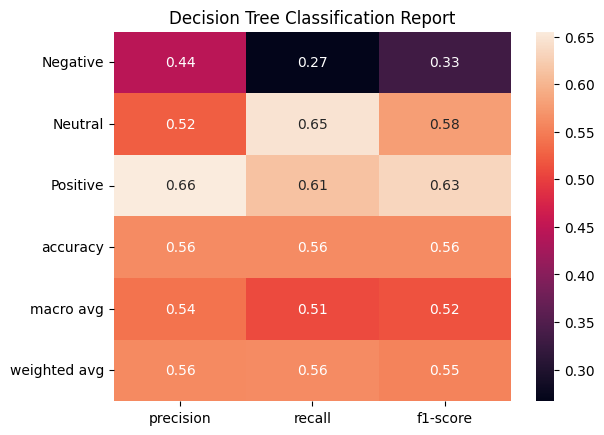

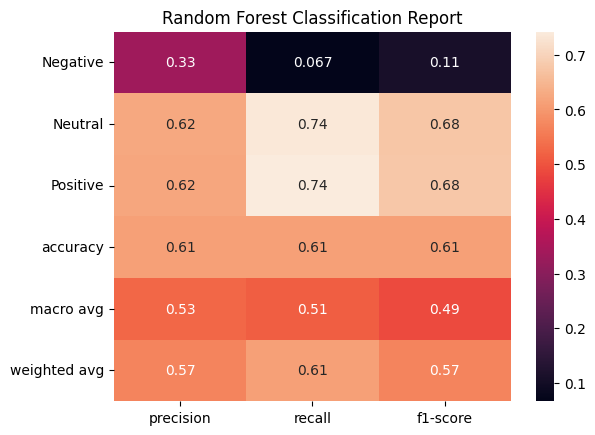

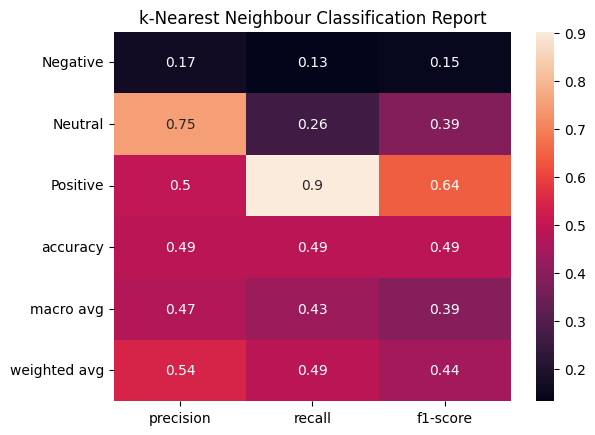

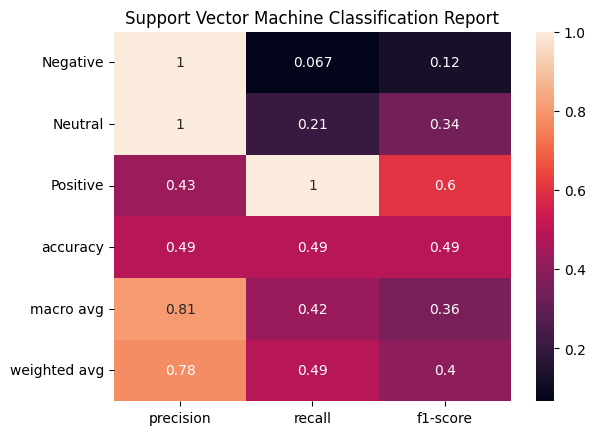

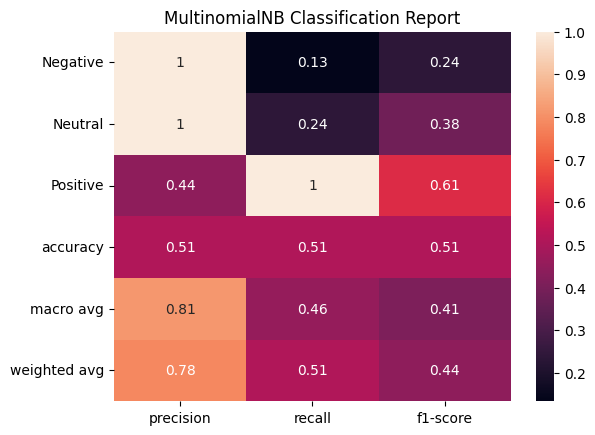

In [261]:
from sklearn.metrics import classification_report
import seaborn as sns

for name, model in models.items():
    report = classification_report(y_test, model.predict(X_test), output_dict=True)
    sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True)
    plt.title(f'{name} Classification Report')
    plt.show()


## As seen above, nearly all of the negative class predicitons lead to the worst scores, perhaps SMOTE or undersampling of the minority class/majority class could lead to a more balamnced score

In [262]:
# Check class distribution before SMOTE
print("Class distribution before SMOTE:", Counter(y))

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.3, random_state=42, stratify=y)

# Apply SMOTE to the training set
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check class distribution after SMOTE
print("Class distribution after SMOTE:", Counter(y_train_smote))


Class distribution before SMOTE: Counter({'Positive': 182, 'Neutral': 124, 'Negative': 91})
Class distribution after SMOTE: Counter({'Positive': 127, 'Neutral': 127, 'Negative': 127})


In [263]:
# Train a model on the SMOTE-balanced data
model.fit(X_train_smote, y_train_smote)

# Evaluate on the test set
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.525


In [264]:
# If probabilities are available, calculate AUC (for binary classification)
try:
    y_prob = model.predict_proba(X_test)[:, 1]  # Use [:, 1] for the positive class
    auc_score = roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr')
except AttributeError:
    auc_score = None
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
cohen_kappa = cohen_kappa_score(y_test, y_pred)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Generate Classification Report
class_report = classification_report(y_test, y_pred)

# Display Metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Cohen's Kappa: {cohen_kappa:.4f}")
if auc_score is not None:
    print(f"AUC Score: {auc_score:.4f}")
print("\nClassification Report:\n", class_report)
print("\nConfusion Matrix:\n", conf_matrix)

Accuracy: 0.5250
Precision: 0.5565
Recall: 0.5250
F1 Score: 0.5286
Cohen's Kappa: 0.2488
AUC Score: 0.6986

Classification Report:
               precision    recall  f1-score   support

    Negative       0.27      0.32      0.30        28
     Neutral       0.74      0.46      0.57        37
    Positive       0.58      0.67      0.62        55

    accuracy                           0.53       120
   macro avg       0.53      0.48      0.49       120
weighted avg       0.56      0.53      0.53       120


Confusion Matrix:
 [[ 9  2 17]
 [10 17 10]
 [14  4 37]]


## Machine learning on FAO data 

In [265]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV

import warnings 
warnings.filterwarnings('ignore')

In [266]:
try:
    df = pd.read_csv('df.csv')
    print(df.head())
except FileNotFoundError:
    print("The file 'merged_data.csv' does not exist.")
except pd.errors.EmptyDataError:
    print("The file 'merged_data.csv' is empty.")
except Exception as e:
    print(f"An error occurred: {e}")
df = df.dropna()

      area        year  barley  beef_and_buffalo_meat_primary  \
0  Austria  2000-01-01  3819.5                         3031.0   
1  Austria  2001-01-01  4655.3                         2993.0   
2  Austria  2002-01-01  4286.6                         2995.0   
3  Austria  2003-01-01  4155.9                         3033.0   
4  Austria  2004-01-01  5261.7                         3058.0   

   cereals_primary  eggs_primary  fruit_primary  meat_poultry  milk_total  \
0           5403.9      165011.0        16294.6       17063.0     47916.0   
1           5856.2      164992.0        15484.6       17531.0     49589.0   
2           5831.0      164986.0        16201.2       17664.0     50362.0   
3           5255.4      165013.0        16950.5       17718.0     51759.0   
4           6495.5      165005.0        17905.3       18297.0     54121.0   

   potatoes  sheep_and_goat_meat  vegetables_primary   wheat  temp_change  \
0   29262.7                204.0             38431.1  4468.8        1

In [267]:
X = df[['barley', 'beef_and_buffalo_meat_primary',
       'cereals_primary', 'eggs_primary', 'fruit_primary', 'meat_poultry',
       'milk_total', 'potatoes', 'sheep_and_goat_meat', 'vegetables_primary',
       'wheat', 'temp_change', 'people_employed_000', 'pesticide_used_tonnes',
       'total_precipitation', 'total_population' ]]
y = df['agriculture_value']

In [268]:
# Split the data into training and testing sets and write the random_state value
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [269]:
# Models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "k-Nearest Neighbour": KNeighborsRegressor(n_neighbors = 7),
    "Support Vector Machine": SVR()
}

In [270]:
# Store results
results = []

# Train and evaluate models
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate performance metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    # Append results to the list
    results.append([name, mae, mse, rmse, r2])

# Create a DataFrame to display the results
results_df = pd.DataFrame(results, columns=["Model", "MAE", "MSE", "RMSE", "R2 Score"])
print(results_df)

                    Model          MAE           MSE          RMSE  R2 Score
0       Linear Regression  4454.881343  4.368725e+07   6609.633180  0.651439
1           Decision Tree  1155.378969  5.431932e+06   2330.650586  0.956661
2           Random Forest  1757.184083  1.296973e+07   3601.350714  0.896520
3     k-Nearest Neighbour  1253.157301  5.626696e+06   2372.065720  0.955107
4  Support Vector Machine  6113.030409  1.446966e+08  12028.989045 -0.154468


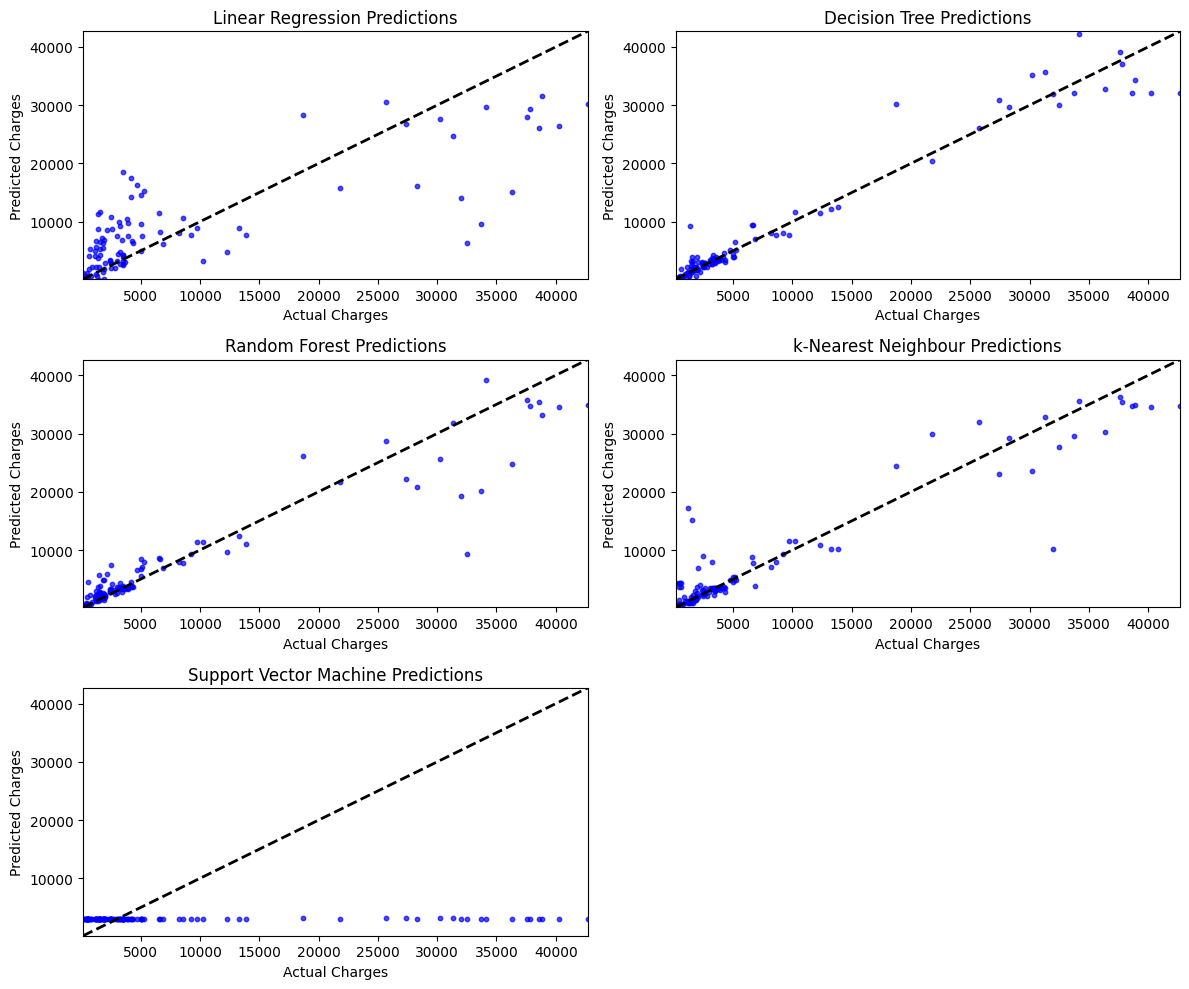

In [271]:
# To demonstrate predictions and plot results, let's split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Predict on the test set for final evaluation
predictions = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    predictions[name] = y_pred

# Plotting actual vs predicted for each model in a 3x2 grid
plt.figure(figsize=(12, 10))  # Adjusted size for a 3x2 layout

for i, (name, y_pred) in enumerate(predictions.items()):
    plt.subplot(3, 2, i + 1)  # 3 rows and 2 columns
    plt.scatter(y_test, y_pred, alpha=0.7, color='blue', s=10)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line
    plt.title(f'{name} Predictions')
    plt.xlabel('Actual Charges')
    plt.ylabel('Predicted Charges')
    plt.xlim(y_test.min(), y_test.max())
    plt.ylim(y_test.min(), y_test.max())

plt.tight_layout()
plt.show()

In [272]:
# Set up parameter grids for each model
param_grid = {
    'Lasso': {'alpha': [0.01, 0.1, 1.0, 10.0]},  # Lasso regularization parameter
    'Decision Tree': {'max_depth': [5, 10, 15]},  # Maximum depth of the tree
    'Random Forest': {'n_estimators': [50, 100, 200]},  # Number of trees in the forest
    'KNN': {'n_neighbors': [3, 5, 7, 9], 'p': [1, 2], 'metric': ['minkowski', 'euclidean', 'cityblock']},  # KNN parameters
    'SVR': {'C': [100, 1000, 10000, 50000], 'gamma': [1, 0.5, 0.1, 0.01], 'kernel': ['rbf']}  # SVR parameters
}

# Store results in an array
results = []
predictions = {}  # To store predictions for plotting

# Define the models in a dictionary
models = {
    "Lasso": Lasso(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "KNN": KNeighborsRegressor(),
    "SVR": SVR()
}

# Train and tune models using Grid Search for hyperparameter tuning
for name, model in models.items():
    grid_search = GridSearchCV(model, param_grid[name], cv=5, scoring='r2')  # 5-fold CV for R²
    
    # Split the data into training and testing sets before fitting
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Fit the grid search
    grid_search.fit(X_train, y_train)
    
    # Best parameters and best score
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    
    # Store results
    results.append([name, best_params, best_score])
    
    # Fit the best model on the training data
    best_model = grid_search.best_estimator_
    
    # Make predictions on the test set
    y_pred = best_model.predict(X_test)
    
    # Store predictions for plotting
    predictions[name] = y_pred

# Create a DataFrame to display the results
results_df = pd.DataFrame(results, columns=["Model", "Best Parameters", "Best CV R² Score"])
print("\nBest Hyperparameters and Scores from Grid Search:")
results_df


Best Hyperparameters and Scores from Grid Search:


,Model,Best Parameters,Best CV R² Score
0,Lasso,{'alpha': 10.0},0.691429
1,Decision Tree,{'max_depth': 15},0.881640
2,Random Forest,{'n_estimators': 200},0.897870
3,KNN,"{'metric': 'minkowski', 'n_neighbors': 3, 'p': 1}",0.907699
4,SVR,"{'C': 50000, 'gamma': 1, 'kernel': 'rbf'}",-0.017521


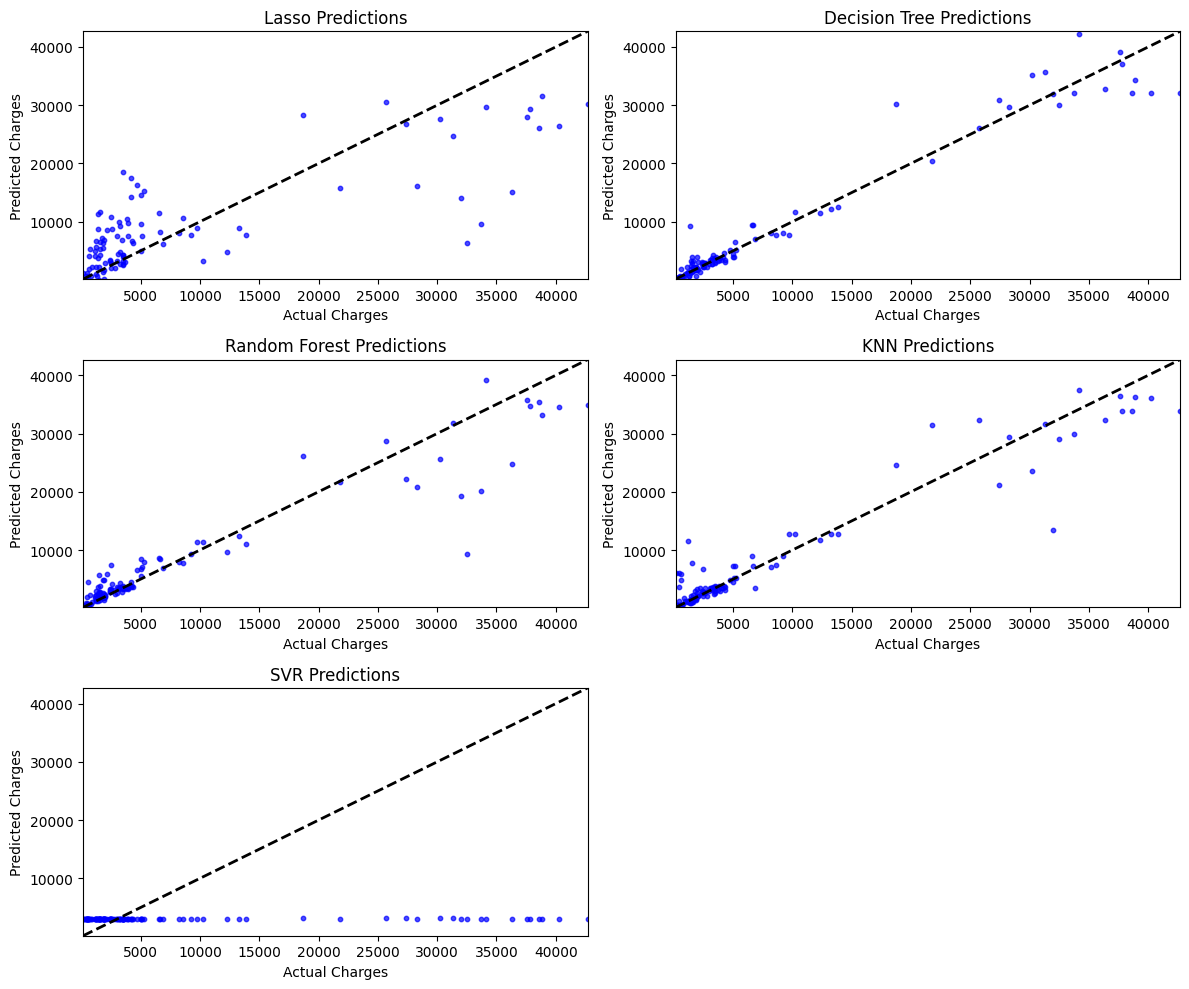

In [273]:
# Predict on the test set for final evaluation
predictions = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    predictions[name] = y_pred

# Plotting actual vs predicted for each model in a 3x2 grid
plt.figure(figsize=(12, 10))  # Adjusted size for a 3x2 layout

for i, (name, y_pred) in enumerate(predictions.items()):
    plt.subplot(3, 2, i + 1)  # 3 rows and 2 columns
    plt.scatter(y_test, y_pred, alpha=0.7, color='blue', s=10)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line
    plt.title(f'{name} Predictions')
    plt.xlabel('Actual Charges')
    plt.ylabel('Predicted Charges')
    plt.xlim(y_test.min(), y_test.max())
    plt.ylim(y_test.min(), y_test.max())

plt.tight_layout()
plt.show()